# Reinforcement Learning Solution to the Towers of Hanoi Puzzle

# Jared Zymbaluk

### Note:

If you wish to plot this data, you can do it with the plot function. Simply call plot with the array that you wish to plot

# Functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy

In [2]:
def printState(state):
    string = ""
    if state[0] and state[1] and state[2]:
        string = string + str(state[0][0]) + " " +str(state[1][0]) + " "+str(state[2][0]) + "\n"
    if state[0] and not state[1] and not state[2]:
        string = string + str(state[0][0]) + "\n" +str(state[0][1]) + "\n"+str(state[0][2]) + "\n"
    if not state[0] and state[1] and not state[2]:
        string = string + "  " + str(state[1][0]) + "\n" + "  " +str(state[1][1]) + "\n" + "  " + str(state[1][2]) + "\n"
    if not state[0] and not state[1] and state[2]:
        string = string + "    " + str(state[2][0]) + "\n" + "    " +str(state[2][1]) + "\n" + "    " + str(state[2][2]) + "\n"
    if state[0] and state[1] and not state[2]:
        if len(state[0])>len(state[1]):
            string = string + str(state[0][0]) + "\n"
            string = string + str(state[0][1]) + " " +str(state[1][0]) + "\n"
        else:
            string = string + "  " + str(state[1][0]) + "\n"
            string = string + str(state[0][0]) + " " +str(state[1][1]) + "\n"
    if not state[0] and state[1] and state[2]:
        if len(state[1])>len(state[2]):
            string = string + "  " + str(state[1][0]) + "\n"
            string = string + "  " + str(state[1][1]) + " " +str(state[2][0]) + "\n"
        else:
            string = string + "    " + str(state[2][0]) + "\n"
            string = string + "  " + str(state[1][0]) + " " +str(state[2][1]) + "\n"
    if state[0] and not state[1] and state[2]:
        if len(state[0])>len(state[2]):
            string = string + str(state[0][0]) + "\n"
            string = string + str(state[0][1]) + "    " +str(state[2][0]) + "\n"
        else:
            string = string + "    " + str(state[2][0]) + "\n"
            string = string + str(state[0][0]) + "   " +str(state[2][1]) + "\n"
                
    string = string + "------"
    print(string)
        

^Prints representation of hanoi game

In [3]:
def validMoves(state):

    moves = []
    if state[0]:
        if state[1]:
            if state[0][0]<state[1][0]:
                moves.append([1,2])
        else:
            moves.append([1,2])
        
        if state[2]:
            if state[0][0]<state[2][0]:
                moves.append([1,3])
        else:
            moves.append([1,3])
    
    if state[1]:
        if state[0]:
            if state[1][0]<state[0][0]:
                moves.append([2,1])
        else:
            moves.append([2,1])
        
        if state[2]:
            if state[1][0]<state[2][0]:
                moves.append([2,3])
        else:
            moves.append([2,3])
            
    if state[2]:
        if state[1]:
            if state[2][0]<state[1][0]:
                moves.append([3,2])
        else:
            moves.append([3,2])
        
        if state[0]:
            if state[2][0]<state[0][0]:
                moves.append([3,1])
        else:
            moves.append([3,1])
            
    return moves
        
        

^Finds valid moves from state

In [4]:
def makeMove(state, move):
    ring1,ring2 = move
    clone = copy.deepcopy(state)
    clone[ring2-1].insert(0,clone[ring1-1].pop(0))
    return clone

^makes a move

In [5]:
def trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF):
    Q={}
    outcomes = np.zeros(nRepetitions)
    epsilons = np.zeros(nRepetitions)
    showMoves = False
    
    for nGames in range(nRepetitions):
        epsilonDecayFactor *= epsilonDecayFactor
        epsilons[nGames] = epsilonDecayFactor
        step = 0
        board = [[1,2,3],[],[]]
        done = False
    
        while not done:        
            step += 1
            # making a move
            move = epsilonGreedy(epsilonDecayFactor, Q, board)
            newBoard = makeMoveF(board,move)
            if (stateMoveTuple(board,move)) not in Q:
                Q[stateMoveTuple(board,move)] = -1  # initial Q value for new board,move
                
            if winner(newBoard):
                # in winning state
                Q[stateMoveTuple(board,move)] = -1
                done = True
                outcomes[nGames] = step
            
            if step > 1:
                Q[stateMoveTuple(boardOld,moveOld)] = Q[stateMoveTuple(boardOld,moveOld)] + learningRate * (-1 + Q[stateMoveTuple(board,move)] - Q[stateMoveTuple(boardOld,moveOld)]) 
                
            boardOld, moveOld = board, move # remember board and move to Q(board,move) can be updated after next steps
            board = newBoard
    return Q,outcomes
    

^This function is heavily inspired by Professor Anderson'stic tac toe code. It takes how many times you'd like to play the game, a learning rate, an epsilon, a valid moves function, and a make moves function. How it operates is it starts a game, decides to make a random move, or a greedy move based on the value of epsilon, then updates the dictionary to reflect your new Q value. It repeats this until the goal state is reached. On the next game, the values of moves are kept in the Q dictionary, so the function now has a better idea of what a good move might be. Leading to less moves over time

In [6]:
def testQ(Q, maxSteps, validMovesF, makeMoveF):
    game = [[1,2,3],[],[]]
    retVal= [game]
    for step in range(maxSteps):
        moves = validMoves(game)
        Qs = np.array([Q.get((stateMoveTuple(game,m)), 0) for m in moves]) 
        move = moves[ np.argmax(Qs) ]
        game = makeMoveF(game,move)
        retVal.append(game)
        if winner(game):
            return retVal
    

^This is a simple function that mimics the behavior of greedy epsilon, in order to find an optimal solution. It starts with a fresh game, and finds the best move out of all the available moves. It continues until the goal state is reached, or the move number is maxed out

In [7]:
def epsilonGreedy(epsilon, Q, board):
    moves = validMoves(board)
    index = np.random.randint(len(moves))
    if np.random.uniform() < epsilon:
        # Random Move
        return moves[index]
    else:
        # Greedy Move
        Qs = np.array([Q.get((stateMoveTuple(board,m)), 0) for m in moves]) 
        return moves[ np.argmax(Qs) ]

^helper function that picks random move, or greedy move

In [8]:
def stateMoveTuple(state, move):
    tuplecopy = state[:]
    tuplecopy = tuple(state[0]),tuple(state[1]),tuple(state[2])
    return tuple(tuplecopy),tuple(move)

^Converts state and move into tuple

In [9]:
def winner(board):
    if board == [[],[],[1,2,3]]:
        return True
    return False

^Shows if board is a winning state

In [10]:
def plot(data):
    plt.plot(data)

^Plots an array (data)

# EXAMPLE:

In [11]:
Q, stepsToGoal = trainQ(50, 0.5, 0.7, validMoves, makeMove)

In [12]:
path = testQ(Q, 20, validMoves, makeMove)

In [13]:
for s in path:
    printState(s)
    print()

1
2
3
------

2
3    1
------

3 2 1
------

  1
3 2
------

  1
  2 3
------

1 2 3
------

    2
1   3
------

    1
    2
    3
------



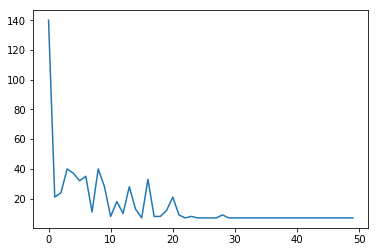

In [14]:
plot(stepsToGoal)